# Honor 3 Survival Regression Analysis


Survival regression predicts the time of an event occurs. For example, we need to predict when a patient will die.

## Censoring

Censoring (删失) is a major concern in survival regression analysis. 

For example, we want to study how long can a patient survive after receiving a heart transplant. And we track the health states of some patients. However, some of the patients have not yet deceased when our study ends at time $C$, and we will not know when they will die (we only know that $T>C$). Then the data are censored.

### Right Censoring

Right censoring underestimates the occurence time of event. 

For example, the study ends before the event occurs, or we fail to follow up the track of a subject.

### Left Censoring

Left censoring misses the beginning time of experiment.

For example, we want to find out when a man with bad lifestyle will get cancer. Suppose he sees a doctor once a year and he is diagnosed with cancer in the $T$-th year. Then he gets cancer in $(T-1)\sim T$-th year.

### Independence

## Survival

Denote $F(t)=\mathbb P(t\leqslant T)$ is the C.D.F of time $T$ and we assume it is continuous and differentiable with density $f(t) = F'(t)$. 

Let the survival function $S(t)$ be defined by $S(t) = F(t>T) = 1 - F(t)$.


### Hazard


Let the hazard function (风险函数) $h(t)$ be defined by

$$h(t) = \lim_{\Delta t\rightarrow 0}\frac{F(t\leqslant T\leqslant t+\Delta t | T\geqslant t)}{\Delta t}
= \lim_{\Delta t\rightarrow 0}\frac{F(t\leqslant T\leqslant t+\Delta t)}{\Delta t\mathbb P(t\geqslant t)} = \frac{f(t)}{S(t)}.$$

Note that $S'(t) = -f(t)$, we can see that 
$$h(t) = -\frac{\partial }{\partial t}\log S(t).$$


The goal of survial analysis is to estimate $F$, $S$, or $h$.

## Kaplan-Meier Survival Curves

Assume we have $n$ observations, whether censored or not, sorted as $t_1\leqslant t_2\leqslant \dotsc \leqslant t_n$. Let $t_0 = 0$ be the starting time. Note that 
$$\frac{S(t_{k+1})}{S(t_k)} = \frac{\mathbb P(T>t_{k+1})}{\mathbb P(T > t_k)} =\mathbb P(T> t_{k+1}|T> t_k).$$

We can thus compute $S(t_1),S(t_2),\dotsc,S(t_n)$ progressively. This is the Kaplan-Meier (KM) method, or known as product-limit method. 

It is a non-parametric model.

## Cox Proportional Hazards Model

Cox proportional hazards (Cox PH) model is one of the most widely used statistical models in medical science. Let $x\in\mathbb R^p$ be a piece of explanatory vector with $p$ features, then

$$h(t,x) = h_0(t)e^{\beta^Tx}.$$

It is a semiparametric model.


### Maximum Likelihood Estimator

Assume we have covariates $x_i\in\mathbb R^p,\ t_i\in\mathbb R_+\ (i=1,\dotsc,n)$. Denote $\delta_i = 1$ if the datum is not censored, and $\delta_i = 0$ if the datum is censored. Then we can derive the likelihood of $(t_i,x_i,\beta)$.

$$\mathcal L(x_i) =\left\{ \begin{aligned} f_{\beta}(t,x_i) \quad & \delta_i = 1\\ S_{\beta}(t,x_i)\quad & \delta_i = 0
\end{aligned}\right. \quad = f_{\beta}(t,x_i) ^{ \delta_i}S_{\beta}(t,x_i) ^{ 1-\delta_i}.
$$

### Partial Likelihood

## Example

Please fetch the lung data at https://www.kaggle.com/datasets/aysuncag/covid19-survival-dataset

Please follow the tutorial at https://onezero.blog/survival-analysis-in-python-km-estimate-cox-ph-and-aft-model/

Please `pip install lifelines` beforehand.

In [49]:
import pandas as pd
import numpy as np
data = pd.read_csv(r'D:\Python Projects\Data Science\Statistics\Advanced Regression Analysis\Honor\Honor3\lung.csv')

# check dummy variables: there is only one ph.ecog == 3, we ignore it
print('Types of ph.ecog:', np.unique(data['ph.ecog'], return_counts = True))
# data = data.drop(np.extract(data['ph.ecog'] == 3, np.arange(data.shape[0])))

# add dummy variables
# data = pd.concat([data, pd.DataFrame(dict(('ph_ecog%d'%i, data['ph.ecog'] == i) for i in 
#                         range(2)))], axis = 1).drop('ph.ecog', axis = 1)

data['status'] = np.where(data['status'] == 1, 0, 1)
data

Types of ph.ecog: (array([0, 1, 2, 3], dtype=int64), array([47, 81, 39,  1], dtype=int64))


,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,455,1,68,1,0,90,90,1225,15
1,210,1,57,1,1,90,60,1150,11
2,1022,0,74,1,1,50,80,513,0
3,310,1,68,2,2,70,60,384,10
4,361,1,71,2,2,60,80,538,1
...,...,...,...,...,...,...,...,...,...
163,203,0,71,2,1,80,90,1025,0
164,191,0,39,1,0,90,90,2350,-5
165,105,0,75,2,2,60,70,1025,5
166,174,0,66,1,1,90,100,1075,1


In [50]:
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(data, duration_col = 'time', event_col = 'status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 168 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 168
number of events observed = 121
   partial log-likelihood = -498.75
         time fit was run = 2022-12-03 17:02:50 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.55       0.58       0.20            -0.94            -0.16                 0.39                 0.85
ph.ecog     0.73       2.08       0.22             0.30             1.17                 1.35                 3.23
ph.karno    0.02       1.02       0.01             0.00             0.04                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  0.92   0.36       1.48
sex           0.00 -2.74   0.01       7.36
ph.ecog       0.00  3.29 <0.005       9.95
ph.karno      0.00  2.00   0.05       4.45
pat.karno     0.00 -1.54   0.12       3.02
meal.cal      0.00  0.13   0.90       0.16
wt.loss       0.00 -1.84   0.07       3.94
---
Concordance = 0.65
Partial AIC = 1011.50
log-likelihood ratio test = 28.33 on 7 df
-log2(p) of ll-ratio test = 12.35

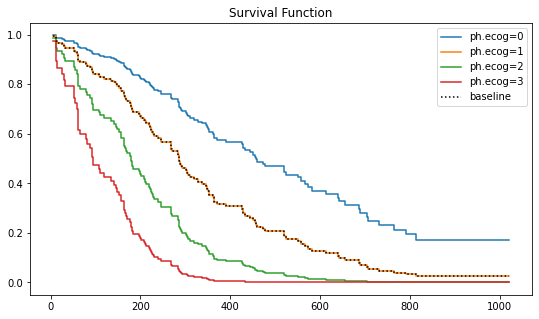

In [51]:
from matplotlib import pyplot as plt
cph.plot_partial_effects_on_outcome(covariates = 'ph.ecog', values = [0, 1, 2, 3], figsize = (9, 5), title = 'Survival Function')
plt.show()

## Refereneces

[1] https://stats.oarc.ucla.edu/wp-content/uploads/2022/05/survival_r.html#(1)

[2] http://sthda.com/english/wiki/cox-proportional-hazards-model

[3] https://onezero.blog/survival-analysis-in-python-km-estimate-cox-ph-and-aft-model/